In [2]:
# Here using following modules/packages for various Data Analysis (Build database and visualize) tasks
#Pandas
#Regular expression (re) module (for finding the exact matching text to search for)
#Python urllib (for sending the HTTP requests)
#BeautifulSoup (for HTML parsing) and ssl (for validations of server certification)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

In [3]:
#Reading the front HTML page and passing on to BeautifulSoup

#here using a simple urllib request with a SSL error ignore context to retrieve this page 
#and then pass it on to the magical BeautifulSoup, which parses the HTML for us and produce a pretty text dump.

#code for reading the front page HTML (Ignore SSL certificate errors, send HTTP request, and read the HTML)

#Ignore SSL certificate errors
ctx = ssl.create_default_context() #Creates a SSL object
ctx.check_hostname = False #disabling process to check hostname
ctx.verify_mode = ssl.CERT_NONE # assisgning verifying mode to ignore the certification validation


In [4]:
# Read the HTML from the URL by sending HTTP request
url = 'https://www.cia.gov/library/publications/the-world-factbook/'
print("Opening connection...")
uh= urllib.request.urlopen(url, context=ctx)
print("HTTP status",uh.getcode())
html =uh.read().decode()
print(f"Reading done. Total {len(html)} characters read.")

Opening connection...
HTTP status 200
Reading done. Total 75036 characters read.


In [5]:
# Passing HTML to Beautifulsoup, parsing it and printing it
#Beautiful Soup is a Python package for parsing HTML and XML documents. 
#It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping

soup = BeautifulSoup(html, 'html.parser') # creates beautifulsoup object
print(soup.prettify()) # to print the HTML file

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="css/publications.css" rel="stylesheet" type="text/css"/>
  <link href="css/publications-detail.css" rel="stylesheet" type="text/css"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   The World Factbook — Central Intelligence Agency
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="Apr 01, 2016" name="LastModified"/>
  <link href="css/jobcart.css" rel="stylesheet"/>
  <link href="css/smallscreen.css" rel="st

In [6]:
# Now lets extract some data from this HTML file
# Lets play with HTML tags and we can get country codes and country names
# Example: <option value="geos/in.html">
#                  India
#                 </option> 

#Here we need the country name which is the text in the option tag and country code is in the value at 6th and 7th position

country_codes=[] #creating python lists for country codes and names
country_names=[]
for tag in soup.find_all('option'):    #finds all the <OPTION tags> 
    country_codes.append(tag.get('value')[5:7])   #Gives the 6th and 7th characters of OPTION values
    country_names.append(tag.text)

temp=country_codes.pop(0) # To remove the first entry 'xx' corresponding to world
temp=country_names.pop(0) # To remove the first entry 'World'

In [7]:
# Lets print out the data extracted

print('COUNTRY NAMES\n'+'-'*30)
for country in country_names[1:]:
    print(country,end=',')
print('\n\nCOUNTRY CODES\n'+'-'*30)
for country in country_codes[1:]:
    print(country,end=',')

COUNTRY NAMES
------------------------------
 Afghanistan , Akrotiri , Albania , Algeria , American Samoa , Andorra , Angola , Anguilla , Antarctica , Antigua and Barbuda , Arctic Ocean , Argentina , Armenia , Aruba , Ashmore and Cartier Islands , Atlantic Ocean , Australia , Austria , Azerbaijan , Bahamas, The , Bahrain , Baker Island , Bangladesh , Barbados , Belarus , Belgium , Belize , Benin , Bermuda , Bhutan , Bolivia , Bosnia and Herzegovina , Botswana , Bouvet Island , Brazil , British Indian Ocean Territory , British Virgin Islands , Brunei , Bulgaria , Burkina Faso , Burma , Burundi , Cabo Verde , Cambodia , Cameroon , Canada , Cayman Islands , Central African Republic , Chad , Chile , China , Christmas Island , Clipperton Island , Cocos (Keeling) Islands , Colombia , Comoros , Congo, Democratic Republic of the , Congo, Republic of the , Cook Islands , Coral Sea Islands , Costa Rica , Cote d'Ivoire , Croatia , Cuba , Curacao , Cyprus , Czechia , Denmark , Dhekelia , Djibouti 

In [8]:
# Web Crawling / Scrapping
# now lets crawl all the pages in the given website, for this we need to know the webpage mapping and pattern in url
# Pattern: there is a fixed URL to which you have to append the 2-character country code and get to the URL of that country’s page
# Fxed url is our baseurl/coutrycode.html
# Once we crawl each page lets save the text of each page in a dictionary with country name as key values

# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
# Creating Empty data dictionary
text_data=dict()
# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = urllib.request.urlopen(url_to_get, context=ctx).read() #reading html file for each page
    soup = BeautifulSoup(html, 'html.parser') #parsing html with beautifulsoup
    txt=soup.get_text()                       # get all the text from the parsed html
    text_data[country_names[i]]=txt           #store the text with key value as corresponding countryname
    print(f"Finished loading data for {country_names[i]}")   #check if text is loaded
    
print ("\n**Finished downloading all text data!**")


Finished loading data for  Afghanistan 
Finished loading data for  Akrotiri 
Finished loading data for  Albania 
Finished loading data for  Algeria 
Finished loading data for  American Samoa 
Finished loading data for  Andorra 
Finished loading data for  Angola 
Finished loading data for  Anguilla 
Finished loading data for  Antarctica 
Finished loading data for  Antigua and Barbuda 
Finished loading data for  Arctic Ocean 
Finished loading data for  Argentina 
Finished loading data for  Armenia 
Finished loading data for  Aruba 
Finished loading data for  Ashmore and Cartier Islands 
Finished loading data for  Atlantic Ocean 
Finished loading data for  Australia 
Finished loading data for  Austria 
Finished loading data for  Azerbaijan 
Finished loading data for  Bahamas, The 
Finished loading data for  Bahrain 
Finished loading data for  Baker Island 
Finished loading data for  Bangladesh 
Finished loading data for  Barbados 
Finished loading data for  Belarus 
Finished loading data 

Finished loading data for  Senegal 
Finished loading data for  Serbia 
Finished loading data for  Seychelles 
Finished loading data for  Sierra Leone 
Finished loading data for  Singapore 
Finished loading data for  Sint Maarten 
Finished loading data for  Slovakia 
Finished loading data for  Slovenia 
Finished loading data for  Solomon Islands 
Finished loading data for  Somalia 
Finished loading data for  South Africa 
Finished loading data for  Southern Ocean 
Finished loading data for  South Georgia and South Sandwich Islands 
Finished loading data for  South Sudan 
Finished loading data for  Spain 
Finished loading data for  Spratly Islands 
Finished loading data for  Sri Lanka 
Finished loading data for  Sudan 
Finished loading data for  Suriname 
Finished loading data for  Svalbard 
Finished loading data for  Swaziland 
Finished loading data for  Sweden 
Finished loading data for  Switzerland 
Finished loading data for  Syria 
Finished loading data for  Taiwan 
Finished loading 

In [11]:
# Now we have all the data in our dictionary keyed with countryname
# Lets store this dictionary object as a character stream in a file object using PICKLE package (pickle dump and pickle load)
# PICKLE is for our convenience as we wont be loading the program again in jupyter notebook again everytime, without repeating the web crawling steps.

import pickle
pickle.dump(text_data,open("text_data_CIA_Factobook.p", "wb"))


In [12]:
# Unpickle and read the data from local storage next time
text_data = pickle.load(open("text_data_CIA_Factobook.p", "rb"))


In [13]:
# lets check if we have no problems with the dictionary

text_data.keys()

dict_keys([' Afghanistan ', ' Akrotiri ', ' Albania ', ' Algeria ', ' American Samoa ', ' Andorra ', ' Angola ', ' Anguilla ', ' Antarctica ', ' Antigua and Barbuda ', ' Arctic Ocean ', ' Argentina ', ' Armenia ', ' Aruba ', ' Ashmore and Cartier Islands ', ' Atlantic Ocean ', ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas, The ', ' Bahrain ', ' Baker Island ', ' Bangladesh ', ' Barbados ', ' Belarus ', ' Belgium ', ' Belize ', ' Benin ', ' Bermuda ', ' Bhutan ', ' Bolivia ', ' Bosnia and Herzegovina ', ' Botswana ', ' Bouvet Island ', ' Brazil ', ' British Indian Ocean Territory ', ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Burkina Faso ', ' Burma ', ' Burundi ', ' Cabo Verde ', ' Cambodia ', ' Cameroon ', ' Canada ', ' Cayman Islands ', ' Central African Republic ', ' Chad ', ' Chile ', ' China ', ' Christmas Island ', ' Clipperton Island ', ' Cocos (Keeling) Islands ', ' Colombia ', ' Comoros ', ' Congo, Democratic Republic of the ', ' Congo, Republic of the ', '

In [19]:
# Now lets extract some logical data from our text data
# we need the demographical population distribution of each country
# We have five different categories for each country and some of the countries dont have these values, so we need to extract
# the data defensively

demographics1=[]
demographics2=[]
demographics3=[]
demographics4=[]
demographics5=[]

offset = len('65 years and over: ')

# Iterate over every country
#for i in range(1,10):
for i in range(1,len(country_names)-1):

    pos1=text_data[country_names[i]].find('0-14 years: ') # finds the position of the text "0-14 years: " Similarly for others
    pos2=text_data[country_names[i]].find('15-24 years: ')
    pos3=text_data[country_names[i]].find('25-54 years: ')
    pos4=text_data[country_names[i]].find('55-64 years: ')
    pos5=text_data[country_names[i]].find('65 years and over: ')
    
    if pos1==-1: #Take a undetectable value, position of the text cannot be -1, until it is absent from the original text
        print(f"**0-14 years % data not found for {country_names[i]}!**")
        demographics1.append(np.nan)
    else:
        text=text_data[country_names[i]][pos1+12:pos1+18] # here 12 is len.('0-14 years: ') which is offset
        end=re.search('%',text).start() # 
        a=float((text_data[country_names[i]][pos1+12:pos1+12+end]))
        demographics1.append(a)
        print(f"0-14 years % data extraction complete for {country_names[i]}!")
    
    if pos2==-1:
        print(f"**15-24 years % data not found for {country_names[i]}!**")
        demographics2.append(np.nan)
    else:
        text=text_data[country_names[i]][pos2+13:pos2+19]
        end=re.search('%',text).start()
        a=float((text_data[country_names[i]][pos2+13:pos2+13+end]))
        demographics2.append(a)
        print(f"15-24 years % data extraction complete for {country_names[i]}!")
        
    if pos3==-1:
        print(f"**25-54 years % data not found for {country_names[i]}!**")
        demographics3.append(np.nan)
    else:
        text=text_data[country_names[i]][pos3+13:pos3+19]
        end=re.search('%',text).start()
        a=float((text_data[country_names[i]][pos3+13:pos3+13+end]))
        demographics3.append(a)
        print(f"25-54 years % data extraction complete for {country_names[i]}!")
    
    if pos4==-1:
        print(f"**55-64 years % data not found for {country_names[i]}!**")
        demographics4.append(np.nan)
    else:
        text=text_data[country_names[i]][pos4+13:pos4+19]
        end=re.search('%',text).start()
        a=float((text_data[country_names[i]][pos4+13:pos4+13+end]))
        demographics4.append(a)
        print(f"55-64 years % data extraction complete for {country_names[i]}!")
    
    
    if pos5==-1:
        print(f"**65 years and beyond % data not found for {country_names[i]}!**")
        demographics5.append(np.nan)
    else:
        text=text_data[country_names[i]][pos5+offset:pos5+offset+6]
        end=re.search('%',text).start()
        a=float((text_data[country_names[i]][pos5+offset:pos5+offset+end]))
        demographics5.append(a)
        print(f"65 years and beyond % data extraction complete for {country_names[i]}!")

0-14 years % data extraction complete for  Afghanistan !
15-24 years % data extraction complete for  Afghanistan !
25-54 years % data extraction complete for  Afghanistan !
55-64 years % data extraction complete for  Afghanistan !
65 years and beyond % data extraction complete for  Afghanistan !
**0-14 years % data not found for  Akrotiri !**
**15-24 years % data not found for  Akrotiri !**
**25-54 years % data not found for  Akrotiri !**
**55-64 years % data not found for  Akrotiri !**
**65 years and beyond % data not found for  Akrotiri !**
0-14 years % data extraction complete for  Albania !
15-24 years % data extraction complete for  Albania !
25-54 years % data extraction complete for  Albania !
55-64 years % data extraction complete for  Albania !
65 years and beyond % data extraction complete for  Albania !
0-14 years % data extraction complete for  Algeria !
15-24 years % data extraction complete for  Algeria !
25-54 years % data extraction complete for  Algeria !
55-64 years %

25-54 years % data extraction complete for  Montserrat !
55-64 years % data extraction complete for  Montserrat !
65 years and beyond % data extraction complete for  Montserrat !
0-14 years % data extraction complete for  Morocco !
15-24 years % data extraction complete for  Morocco !
25-54 years % data extraction complete for  Morocco !
55-64 years % data extraction complete for  Morocco !
65 years and beyond % data extraction complete for  Morocco !
0-14 years % data extraction complete for  Mozambique !
15-24 years % data extraction complete for  Mozambique !
25-54 years % data extraction complete for  Mozambique !
55-64 years % data extraction complete for  Mozambique !
65 years and beyond % data extraction complete for  Mozambique !
0-14 years % data extraction complete for  Namibia !
15-24 years % data extraction complete for  Namibia !
25-54 years % data extraction complete for  Namibia !
55-64 years % data extraction complete for  Namibia !
65 years and beyond % data extraction

In [20]:
# Finally lets use panda to analyze and visualize the data
# lets make a dictionary of the demographical data

demograph_dict = {
    '0-14 years %':demographics1,
    '15-24 years %':demographics2,
    '25-54 years %':demographics3,
    '55-64 years %':demographics4,
    '65 years and above %':demographics5
}


In [21]:
# USing panda pd dataframe object to view data as columns and rows
dataframe_demograph=pd.DataFrame(data=demograph_dict,index=country_names[1:len(country_codes)-1])
dataframe_demograph.index.name='COUNTRY'
dataframe_demograph.dropna(inplace=True)
dataframe_demograph

,0-14 years %,15-24 years %,25-54 years %,55-64 years %,65 years and above %
COUNTRY,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59
Albania,18.05,17.47,41.06,11.54,11.89
Algeria,29.31,15.30,42.93,6.81,5.65
American Samoa,30.28,18.79,36.38,8.58,5.97
Andorra,14.40,9.64,46.18,14.16,15.61
Angola,48.12,18.25,28.03,3.26,2.34
Anguilla,22.21,14.08,43.82,11.06,8.84
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06
Argentina,24.59,15.28,39.38,9.13,11.62


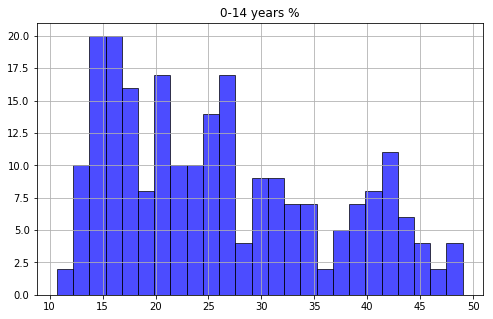

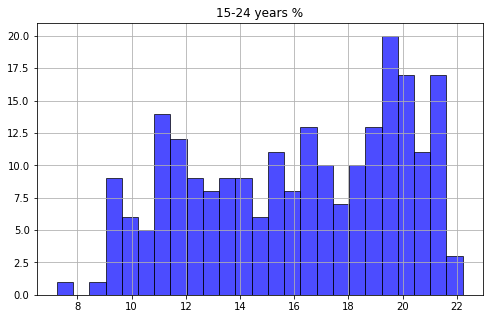

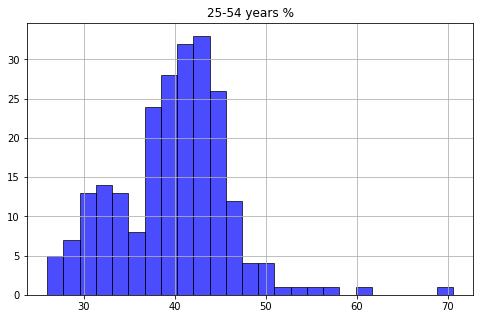

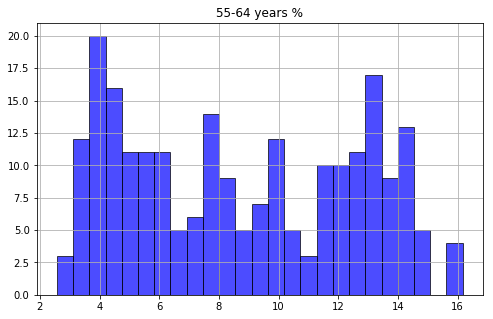

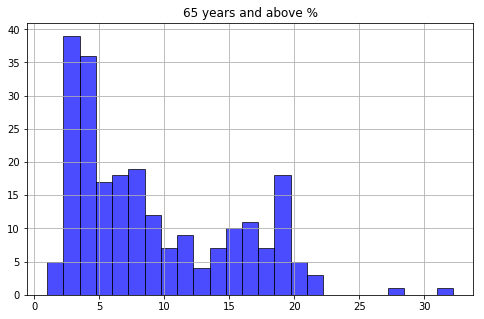

In [23]:
# lets analyze data with some histogram plots
for i in range(5):
    dataframe_demograph.hist(dataframe_demograph.columns[i],bins=25,figsize=(8,5),color='blue',edgecolor='k',alpha=0.7)
    plt.show()

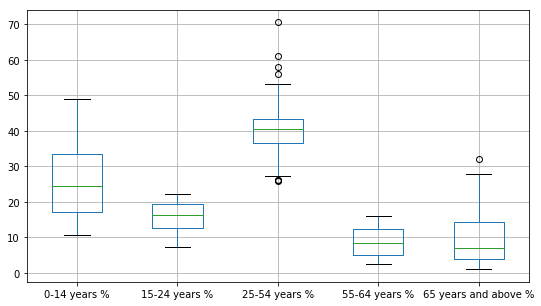

In [24]:
# Lets plot a boxplot to get more insights from the data
dataframe_demograph.boxplot(figsize=(9,5))
plt.show()

In [ ]:
# This shows that about 40% of world population is under in the age gap of 25-54 years.